# Regression for Amateurs (and Humanities Majors)

![img](images/serious_man.png)

The *broad goal* of this notebook is to provide simple analogues between the fundamentals of machine learning (and associated libraries/algorithms) and baseline algebraic concepts that many prospective students of data science are likely already familiar with.

## Starting simple: a straight line

First, I import numpy and matplotlib's `pyplot` libary using their standard aliases: `np` and `plt`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Enabling display of matplotlib visuals in notebook
%matplotlib inline

Next, I define two variables that I can use to create a simple, demonstrative graph:

- $x$, the *independent* variable, is an array of integers created using numpy's `arange` method.
- $y$, the *dependent* variable, is an array of values *drawn from a function* that multiplies the value of $x$ by 3 then subtracts 3.

In [14]:
# Creating a NumPy array of integers from 0 to 29
x = np.arange(0, 30)

# Creating variable y, a function of 
y = (3 * x) - 3

The last line of that cell is just code for the simple linear formula $y = mx + b$, where $m = 3$ and $b = -3$. Below, we visualize that line.

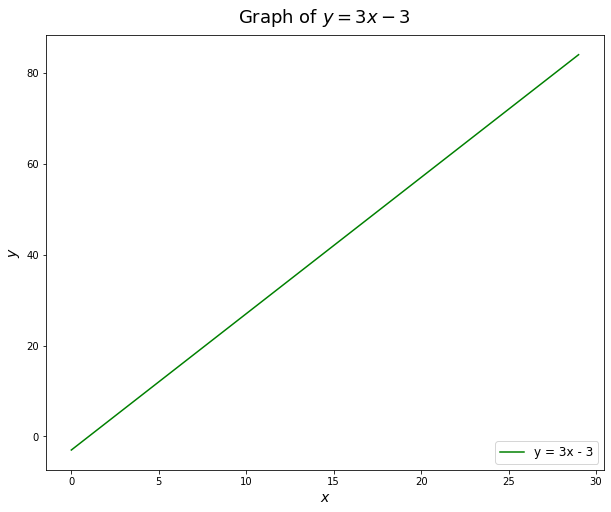

In [3]:
# Plotting x against y!

# Creating figure, establishing size
fig, ax = plt.subplots(figsize = (10, 8))

# Initializing line plot
ax.plot(x, y,
        linestyle = '-',
        color = 'g',
        label = 'y = 3x - 3')

# Setting labels for x and y axes
# (the text wrapped in dollar signs is LaTeX formatting!)
ax.set_xlabel(xlabel = '$x$',
              fontdict = {'fontsize': 14},
              labelpad = 4)
ax.set_ylabel(ylabel = '$y$',
              fontdict = {'fontsize': 14},
              labelpad = 4)

# Creating and resizing legend
ax.legend(loc = 'lower right',
          fontsize = 'large')

# Giving the graph a title
ax.set_title(label = 'Graph of $y = 3x - 3$',
             fontdict = {'fontsize': 18},
             pad = 12);

# Saving a high-res copy of the figure for future use
# fig.savefig(fname = 'images/linear_function.jpg',
#             dpi = 400)

If only things were always **this** easy to plot! Sadly, real data is almost invariably going to be messier, and, further down in this notebook, I'll investigate how to **find a line that best fits your data**.

## Searching for a line of best fit

In [4]:
import pandas as pd
import seaborn as sns

We'll use the `iris` dataset - one of seaborn's 'toy' datasets - because of its relative compactness, and because its features (measures of length & width for the petals & sepals of three different types of iris) lend themselves well to illustrating linear relationships and linear regression.

In [5]:
# Load in some toy data, assign the DataFrame to `df`
df = sns.load_dataset('iris')

# Check it out: first, data types and size...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# ...and a few of the rows, to help us visualize the data
df.sample(n=10,
          random_state=138)

,sepal_length,sepal_width,petal_length,petal_width,species
58,6.6,2.9,4.6,1.3,versicolor
8,4.4,2.9,1.4,0.2,setosa
23,5.1,3.3,1.7,0.5,setosa
89,5.5,2.5,4.0,1.3,versicolor
138,6.0,3.0,4.8,1.8,virginica
2,4.7,3.2,1.3,0.2,setosa
94,5.6,2.7,4.2,1.3,versicolor
14,5.8,4.0,1.2,0.2,setosa
59,5.2,2.7,3.9,1.4,versicolor
84,5.4,3.0,4.5,1.5,versicolor


Looking at some of the rows, I can observe and conclude that the values for `petal_length` and `sepal_length` tend to increase when one or the other increases, with some variance that seems to depend on `species`. We can probably, then, describe the relationship between `petal_length` and `sepal_length` using a **linear regression model**.

Linear regression models are appropriate when there is a **linear relationship** between a target variable $y$ (also called a *dependent variable*, depending on what discipline you're working in) and one or more independent variables, represented by $X$.

> There are some other [assumptions](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression4.html) that your data should satisfy before you settle on using a linear regression model, but those are a bit outside the scope of this post. Part of why I'm using the `iris` dataset is because it *is* so neatly fit for linear regression, and this, after all, is only an example.

If that didn't make sense, the graph below might help clear things up.

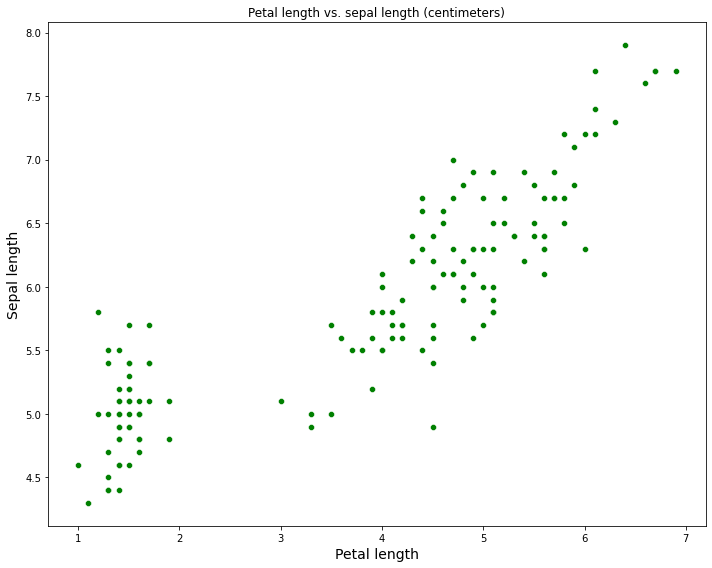

In [7]:
# Instantiate ax object, set figure size and title
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Petal length vs. sepal length (centimeters)')

# Plot petal_length vs. sepal_length
sns.scatterplot(x = df.petal_length,
                y = df.sepal_length,
                color = 'g')

ax.set_xlabel('Petal length',
              fontdict = {'fontsize': 14},
              labelpad = 4)
ax.set_ylabel('Sepal length',
              fontdict = {'fontsize': 14},
              labelpad = 4)

# Formatting for clarity and readability
plt.tight_layout()

Glancing at the scatter plot above, we can reasonably conclude that there is a *linear relationship* of some degree between `petal_length` and `sepal_length`. But how can we ascertain *what* exactly that relationship is, or anything about the nature of that relationship? This is where tools for machine learning and inferential statistics come in handy.

## scikit-learn and `LinearRegression`

seaborn's `regplot` provides a way to visualize linear regression very easily.

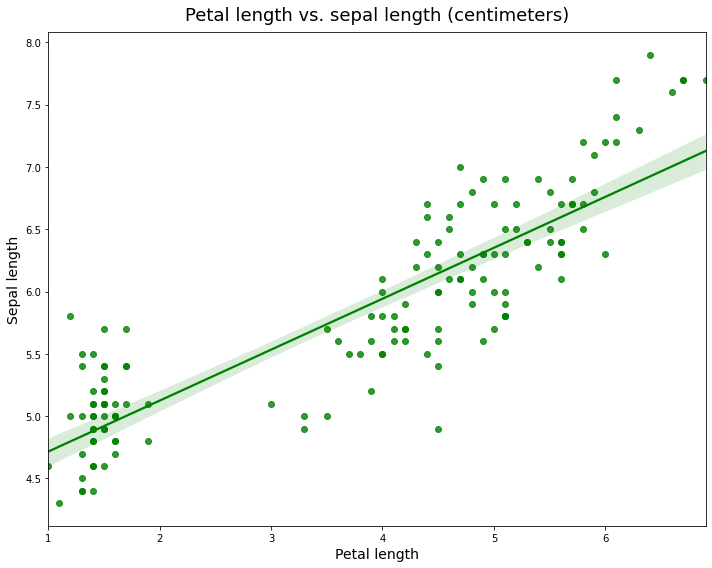

In [13]:
# Same code as before, but with `regplot` this time
# instead of `scatterplot`

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Petal length vs. sepal length (centimeters)',
             fontdict = {'fontsize': 18},
             pad = 12)

sns.regplot(x = df.petal_length,
            y = df.sepal_length,
            color = 'g')

ax.set_xlabel('Petal length',
              fontdict = {'fontsize': 14},
              labelpad = 4)
ax.set_ylabel('Sepal length',
              fontdict = {'fontsize': 14},
              labelpad = 4)

plt.tight_layout()

# fig.savefig(fname = 'images/best_fit_regplot.jpg',
#             dpi = 400)

Under the hood, seaborn has crunched and displayed a line that measures the relationship between `petal_length` and `sepal_length`. But what if we wanted some more information on that relationship?

In [9]:
X = df.drop(columns = ['sepal_length', 'species'])
y = df.sepal_length

In [10]:
# Import the relevant class from sk-learn
from sklearn.linear_model import LinearRegression

# Instantiate linear regression class object
lr = LinearRegression()

# Fit on X and y
lr.fit(X, y)

# Score!
lr.score(X, y)

0.8586117200663179

The score that our model `lr` is returning on the data $X$ and $y$ is called the $r^2$ value - it describes the **proportion of variance** in the target variable $y$ (in this case, sepal length) is determined by $X$ (in this case, petal length). You can read more about the $r^2$ score and what it represents [here](https://en.wikipedia.org/wiki/Coefficient_of_determination).